<a href="https://colab.research.google.com/github/DavSanp/TAM_2025-01/blob/main/TAM_05_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyección analítica de [3 2] sobre [4 1]: [3.29411765 0.82352941]
Alpha analítico: 0.8235294117647058
Proyección por gradiente descendiente de [3 2] sobre [4 1]: [3.29411765 0.82352941]
Alpha por gradiente descendiente: 0.8235294117647057
Proyección por gradiente ascendente de [3 2] sobre [4 1]: [-4.19312173e+127 -1.04828043e+127]
Alpha por gradiente ascendente: -1.0482804322572074e+127


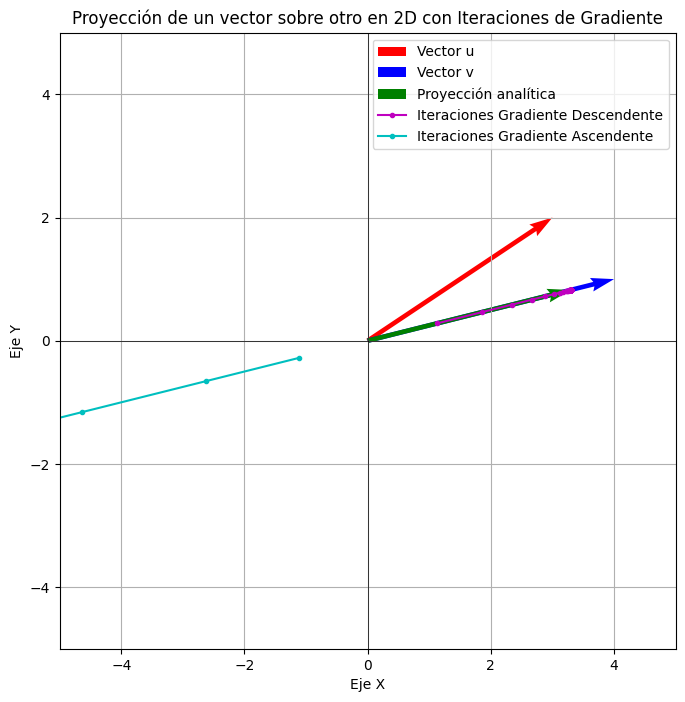

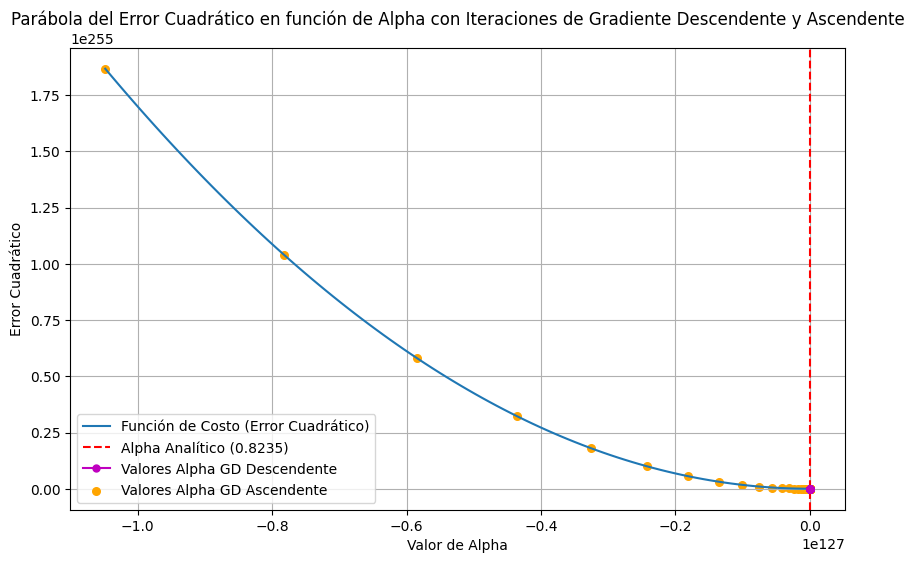


Criterios comunes para detener la iteración en Gradiente Descendiente:
1. Número máximo de iteraciones: Detenerse después de un número predefinido de pasos.
2. Convergencia del gradiente: Detenerse cuando la magnitud del gradiente se acerca a cero.
3. Convergencia del error: Detenerse cuando el cambio en la función de costo entre iteraciones es muy pequeño.
4. Convergencia de los parámetros: Detenerse cuando el cambio en los parámetros (en este caso, alpha) entre iteraciones es muy pequeño.


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# --- Solución Analítica ---

def analytical_projection(u, v):
  """
  Calcula la proyección de u sobre v usando la solución analítica y el escalar alpha.

  Args:
    u: Vector a proyectar (numpy array 2D).
    v: Vector sobre el que se proyecta (numpy array 2D).

  Returns:
    Una tupla que contiene:
      - La proyección de u sobre v (numpy array 2D).
      - El escalar alpha.
  """
  # Fórmula analítica para la proyección de u sobre v: proj_v(u) = ((u . v) / ||v||^2) * v
  # u . v es el producto punto de u y v
  dot_product = np.dot(u, v)
  # ||v||^2 es la norma cuadrada de v
  v_norm_squared = np.dot(v, v)

  # Evitar división por cero si v es el vector cero
  if v_norm_squared == 0:
    return np.zeros_like(u), 0.0

  # Calcular el escalar alpha
  alpha = dot_product / v_norm_squared
  # Calcular la proyección
  projection = alpha * v
  return projection, alpha

# --- Solución por Gradiente Descendiente y Ascendente ---

def gradient_process_with_history(u, v, learning_rate=0.01, iterations=1000, process_type='descent'):
  """
  Calcula la proyección de u sobre v usando gradiente descendiente o ascendente,
  guarda el historial de proyección y alpha, y devuelve el alpha final.

  Args:
    u: Vector a proyectar (numpy array 2D).
    v: Vector sobre el que se proyecta (numpy array 2D).
    learning_rate: Tasa de aprendizaje para el gradiente.
    iterations: Número de iteraciones para el gradiente.
    process_type: 'descent' para gradiente descendente, 'ascension' para gradiente ascendente.

  Returns:
    Una tupla que contiene:
      - La proyección final de u sobre v (numpy array 2D).
      - Una lista del historial de proyecciones intermedias.
      - El escalar alpha final.
      - Una lista del historial de valores de alpha.
  """
  alpha = 0.0
  projection_history = []
  alpha_history = []

  for i in range(iterations):
    error = u - alpha * v
    gradient = -2 * np.dot(error, v)

    if process_type == 'descent':
        alpha = alpha - learning_rate * gradient
    elif process_type == 'ascension':
        alpha = alpha + learning_rate * gradient # Cambiado a suma para ascenso

    # Guardamos la proyección actual y alpha en el historial
    projection_history.append(alpha * v)
    alpha_history.append(alpha)

  return alpha * v, projection_history, alpha, alpha_history


# --- Función de Costo ---
def cost_function(alpha, u, v):
    """
    Calcula el error cuadrático para un dado alpha.

    Args:
        alpha: El escalar.
        u: Vector a proyectar.
        v: Vector sobre el que se proyecta.

    Returns:
        El valor del error cuadrático.
    """
    return np.sum((u - alpha * v)**2)

# --- Ejemplo de Uso ---

# Definimos dos vectores en 2D
u = np.array([3, 2])
v = np.array([4, 1])

# Calculamos la proyección usando la solución analítica y obtenemos alpha
analytical_proj, analytical_alpha = analytical_projection(u, v)
print(f"Proyección analítica de {u} sobre {v}: {analytical_proj}")
print(f"Alpha analítico: {analytical_alpha}")


# Calculamos la proyección usando gradiente descendiente y ascendente, obtenemos el historial y alpha final
gradient_descent_proj, descent_projection_history, gradient_descent_alpha, descent_alpha_history = gradient_process_with_history(u, v, learning_rate=0.01, iterations=1000, process_type='descent')
print(f"Proyección por gradiente descendiente de {u} sobre {v}: {gradient_descent_proj}")
print(f"Alpha por gradiente descendiente: {gradient_descent_alpha}")

gradient_ascension_proj, ascension_projection_history, gradient_ascension_alpha, ascension_alpha_history = gradient_process_with_history(u, v, learning_rate=0.01, iterations=1000, process_type='ascension')
print(f"Proyección por gradiente ascendente de {u} sobre {v}: {gradient_ascension_proj}")
print(f"Alpha por gradiente ascendente: {gradient_ascension_alpha}")


# --- Visualización de Proyección e Iteraciones ---

plt.figure(figsize=(8, 8))
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector u')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector v')
plt.quiver(0, 0, analytical_proj[0], analytical_proj[1], angles='xy', scale_units='xy', scale=1, color='g', label='Proyección analítica')

# Graficamos las iteraciones del gradiente descendiente
descent_history_x = [p[0] for p in descent_projection_history]
descent_history_y = [p[1] for p in descent_projection_history]
plt.plot(descent_history_x, descent_history_y, 'm-o', markersize=3, label='Iteraciones Gradiente Descendente')

# Graficamos las iteraciones del gradiente ascendente
ascension_history_x = [p[0] for p in ascension_projection_history]
ascension_history_y = [p[1] for p in ascension_projection_history]
plt.plot(ascension_history_x, ascension_history_y, 'c-o', markersize=3, label='Iteraciones Gradiente Ascendente')


plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Proyección de un vector sobre otro en 2D con Iteraciones de Gradiente')
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# --- Visualización de la Parábola del Error vs Alpha ---
plt.figure(figsize=(10, 6))
# Creamos un rango de valores de alpha para graficar la parábola
all_alpha_history = descent_alpha_history + ascension_alpha_history
min_alpha = min(all_alpha_history) if all_alpha_history else -2 # Default if history is empty
max_alpha = max(all_alpha_history) if all_alpha_history else 2 # Default if history is empty
alpha_values = np.linspace(min_alpha - 0.5, max_alpha + 0.5, 100) # Adjust range based on alpha history

# Calculamos el error para cada valor de alpha
error_values = [cost_function(a, u, v) for a in alpha_values]

plt.plot(alpha_values, error_values, label='Función de Costo (Error Cuadrático)')
plt.axvline(analytical_alpha, color='r', linestyle='--', label=f'Alpha Analítico ({analytical_alpha:.4f})')

# Graficar los valores de alpha del historial del gradiente descendiente como una línea con marcadores
plt.plot(descent_alpha_history, [cost_function(a, u, v) for a in descent_alpha_history], 'm-o', markersize=5, label='Valores Alpha GD Descendente')

# Graficar los valores de alpha del historial del gradiente ascendente
plt.scatter(ascension_alpha_history, [cost_function(a, u, v) for a in ascension_alpha_history], color='orange', label='Valores Alpha GD Ascendente', s=30)


plt.xlabel('Valor de Alpha')
plt.ylabel('Error Cuadrático')
plt.title('Parábola del Error Cuadrático en función de Alpha con Iteraciones de Gradiente Descendente y Ascendente')
plt.grid()
plt.legend()
plt.show()


# --- Criterios de Detención para Gradiente Descendiente ---
print("\nCriterios comunes para detener la iteración en Gradiente Descendiente:")
print("1. Número máximo de iteraciones: Detenerse después de un número predefinido de pasos.")
print("2. Convergencia del gradiente: Detenerse cuando la magnitud del gradiente se acerca a cero.")
print("3. Convergencia del error: Detenerse cuando el cambio en la función de costo entre iteraciones es muy pequeño.")
print("4. Convergencia de los parámetros: Detenerse cuando el cambio en los parámetros (en este caso, alpha) entre iteraciones es muy pequeño.")

👉 Selecciona exactamente 3 imágenes (JPG/PNG)


Saving 3.webp to 3 (2).webp
Saving 2.webp to 2 (2).webp
Saving 1.jpg to 1 (2).jpg
📏 Distancias Euclidianas:
  1 (2).jpg  —  2 (2).webp : 44.755707
  1 (2).jpg  —  3 (2).webp : 47.508125
  2 (2).webp  —  3 (2).webp : 47.092945

✅ Más parecidas: 1 (2).jpg y 2 (2).webp  (dist = 44.7557)


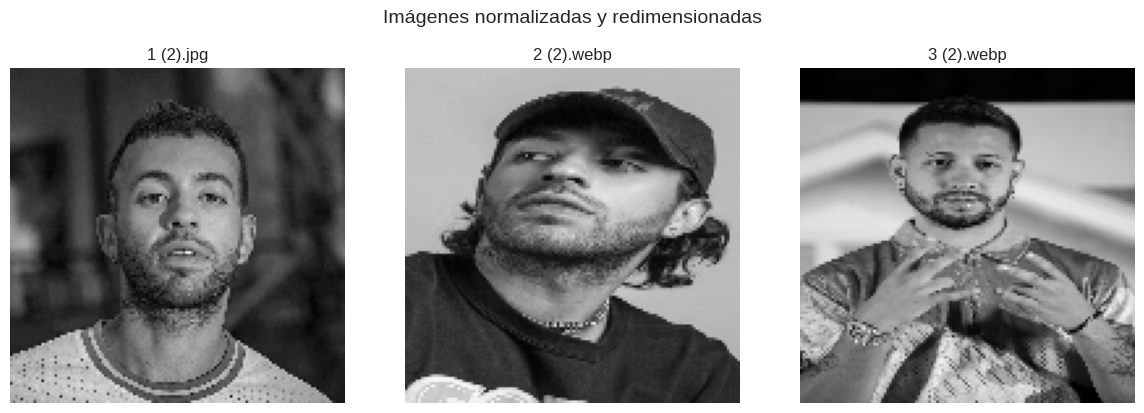

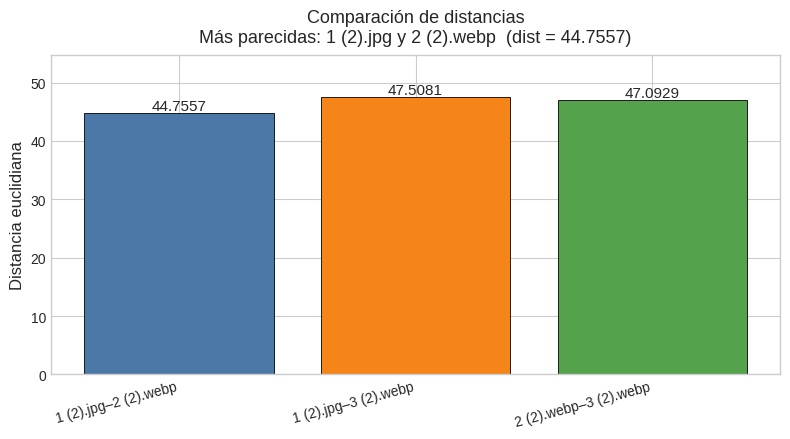

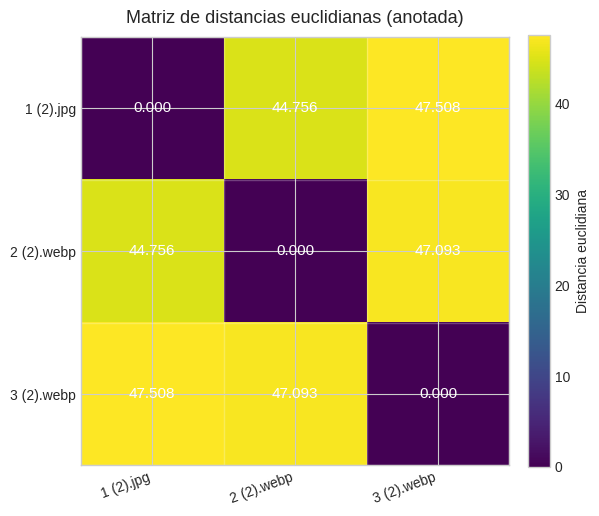

In [33]:
# ===============================================================
# COMPARACIÓN DE 3 IMÁGENES CON DISTANCIA EUCLIDIANA (COLAB)
# ---------------------------------------------------------------
# - Sube 3 imágenes desde tu PC.
# - Convierte cada imagen a vector normalizado.
# - Calcula distancias euclidianas entre pares.
# - Grafica: imágenes, barras comparativas y heatmap anotado.
# Autor: tú + ChatGPT :)
# ===============================================================

# ---------- Imports ----------
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ---------- Estilo gráfico (bonito pero sobrio) ----------
plt.style.use("seaborn-v0_8-whitegrid")  # estilo limpio
# Paleta simple (no dependemos de seaborn como librería)
PALETTE = {
    "bar": "#4C78A8",
    "bar2": "#F58518",
    "bar3": "#54A24B",
    "accent": "#E45756",
    "heat_text": "white",
}

# ===============================================================
# 1) SUBIR IMÁGENES
# ===============================================================
print("👉 Selecciona exactamente 3 imágenes (JPG/PNG)")
uploaded = files.upload()
img_paths = list(uploaded.keys())
if len(img_paths) != 3:
    raise ValueError(f"Debes subir 3 imágenes, subiste {len(img_paths)}.")

# (Orden fijo por reproducibilidad)
img_paths.sort()

# ===============================================================
# 2) UTILIDADES
# ===============================================================
def short_name(path, maxlen=20):
    """Acorta nombres largos para títulos/etiquetas."""
    base = os.path.basename(path)
    return base if len(base) <= maxlen else ("…" + base[-(maxlen-1):])

def load_and_vectorize(img_path, size=(128, 128), as_gray=True):
    """
    Lee imagen, la homogeneiza y la vectoriza.
    - size: tamaño al que se redimensiona para que todas tengan la misma dimensión.
    - as_gray=True: usa escala de grises (más simple y estable para comparación base).
    Retorna:
      vector_1D_normalizado, imagen_2D_para_mostrar
    """
    read_flag = cv2.IMREAD_GRAYSCALE if as_gray else cv2.IMREAD_COLOR
    img = cv2.imread(img_path, read_flag)

    if img is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen en {img_path}. Verifica la ruta/nombre.")

    # Redimensionamos con interpolación bilineal (suave)
    img_resized = cv2.resize(img, size, interpolation=cv2.INTER_LINEAR)

    # Vectorizar y normalizar a [0, 1]
    vec = img_resized.astype(np.float32).reshape(-1) / 255.0
    return vec, img_resized

def euclidean_distance(u, v):
    """Distancia Euclidiana estándar."""
    return np.linalg.norm(u - v)

def annotate_bars(ax, values, fmt="{:.4f}"):
    """Escribe el valor sobre cada barra."""
    for i, v in enumerate(values):
        ax.text(i, v, fmt.format(v), ha="center", va="bottom", fontsize=11)

def plot_heatmap(D, labels, title="Matriz de distancias euclidianas"):
    """
    Heatmap con anotaciones numéricas.
    D: matriz 3x3 de distancias.
    labels: lista de nombres (3).
    """
    fig, ax = plt.subplots(figsize=(6, 5.4))
    im = ax.imshow(D, cmap="viridis")
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Distancia euclidiana", rotation=90)

    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=20, ha="right")
    ax.set_yticklabels(labels)
    ax.set_title(title, fontsize=13, pad=10)

    # Anotar cada celda
    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            ax.text(j, i, f"{D[i, j]:.3f}", ha="center", va="center", color=PALETTE["heat_text"], fontsize=11)

    # Cuadrícula ligera encima
    ax.set_xticks(np.arange(-.5, len(labels), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(labels), 1), minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=1, alpha=0.25)
    ax.tick_params(which="minor", bottom=False, left=False)
    plt.tight_layout()
    plt.show()

# ===============================================================
# 3) CARGA + VECTORIZACIÓN
# ===============================================================
# A mayor tamaño, más detalle; 128×128 es un buen equilibrio
size_for_vectors = (128, 128)

u1, img1 = load_and_vectorize(img_paths[0], size=size_for_vectors, as_gray=True)
u2, img2 = load_and_vectorize(img_paths[1], size=size_for_vectors, as_gray=True)
u3, img3 = load_and_vectorize(img_paths[2], size=size_for_vectors, as_gray=True)

names_short = [short_name(p) for p in img_paths]

# ===============================================================
# 4) DISTANCIAS EUCLIDIANAS
# ===============================================================
d12 = euclidean_distance(u1, u2)
d13 = euclidean_distance(u1, u3)
d23 = euclidean_distance(u2, u3)

print("📏 Distancias Euclidianas:")
print(f"  {names_short[0]}  —  {names_short[1]} : {d12:.6f}")
print(f"  {names_short[0]}  —  {names_short[2]} : {d13:.6f}")
print(f"  {names_short[1]}  —  {names_short[2]} : {d23:.6f}")

pairs = [
    (names_short[0], names_short[1], d12),
    (names_short[0], names_short[2], d13),
    (names_short[1], names_short[2], d23),
]
pairs_sorted = sorted(pairs, key=lambda x: x[2])
summary = f"Más parecidas: {pairs_sorted[0][0]} y {pairs_sorted[0][1]}  (dist = {pairs_sorted[0][2]:.4f})"
print("\n✅", summary)

# ===============================================================
# 5) VISUALIZACIONES BONITAS
# ===============================================================

# 5.1 Mosaico de imágenes (ya homogeneizadas)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, img, name in zip(axes, [img1, img2, img3], names_short):
    ax.imshow(img, cmap="gray")
    ax.set_title(name, fontsize=12)
    ax.axis("off")
fig.suptitle("Imágenes normalizadas y redimensionadas", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# 5.2 Barras comparativas con anotaciones
labels = [f"{names_short[0]}–{names_short[1]}",
          f"{names_short[0]}–{names_short[2]}",
          f"{names_short[1]}–{names_short[2]}"]
values = [d12, d13, d23]
colors = [PALETTE["bar"], PALETTE["bar2"], PALETTE["bar3"]]

fig, ax = plt.subplots(figsize=(8, 4.5))
bars = ax.bar(labels, values, color=colors, edgecolor="black", linewidth=0.6)
ax.set_ylabel("Distancia euclidiana", fontsize=12)
ax.set_title(f"Comparación de distancias\n{summary}", fontsize=13, pad=10)
annotate_bars(ax, values)
ax.set_ylim(0, max(values) * 1.15)
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.show()

# 5.3 Heatmap anotado de la matriz de distancias
D = np.array([
    [0.0, d12, d13],
    [d12, 0.0, d23],
    [d13, d23, 0.0]
], dtype=float)

plot_heatmap(D, names_short, title="Matriz de distancias euclidianas (anotada)")
